# Traffic signs with opencv (left and right)
------

## Data: Images from  the unity of 'Cuoc Dua So'

In [1]:
# import library
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# the default sign
sign = 0 

# define the range of blue color (background of traffic signs)
lowerBound = np.array([98, 109, 20])
upperBound = np.array([112, 255, 255])

# min_area for removing small independent objects
min_area = 400

In [3]:
# find contours of blue color in an image
def find_contours(image):
    kernelOpen = np.ones((5, 5))
    kernelClose = np.ones((20, 20))

    # convert BGR to HSV
    imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # create the Mask
    mask = cv2.inRange(imgHSV, lowerBound, upperBound)

    # morphology to remove noise
    maskOpen = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernelOpen)
    maskClose = cv2.morphologyEx(maskOpen, cv2.MORPH_CLOSE, kernelClose)

    maskFinal = maskClose
    _, conts, _ = cv2.findContours(maskFinal.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    cv2.imshow('mask', mask)
    cv2.imshow('maskOpen', maskOpen)
    cv2.imshow('maskClose', maskClose)
    
    return conts

In [4]:
def get_traffix_sign(image, conts):
    for i in range(len(conts)):
        x, y, w, h = cv2.boundingRect(conts[i])
        
        # center point of 1/4 upper conner image
        cX = int(w/2)+x
        cY = int(h/4)+y
        
        if (cv2.contourArea(conts[i]) > min_area):
            # draw the bounding box 
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

            # the upper left conner of rectangle
            imgl = image[y:cY, x:cX]
            conts1 = find_contours(imgl)

            # the upper right conner of rectangle
            imgr = image[y:cY, cX:x+w]
            conts2 = find_contours(imgr)
            
            area_left = cv2.contourArea(conts1[i])
            area_right = cv2.contourArea(conts2[i])
            if area_left > area_right:  # right
                sign = 1
                txt = 'right'

            elif area_left < area_right:  # left
                sign = -1
                txt = 'left'
            cv2.putText(image,txt,(x,y-1),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,255),2,cv2.LINE_AA)
                    
    return sign, image

In [5]:
def test_image(image):
    height, width = image.shape[:2]
    SKYLINE = int(height * 0.45)
    roi = image[0:SKYLINE, 0:width]
    conts = find_contours(roi)
    sign, image = get_traffix_sign(image,conts)
    plt.imshow(image)
    plt.show

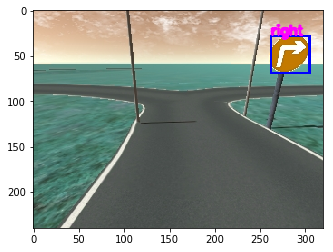

In [6]:
img = cv2.imread('083834_326478.png')
test_image(img)


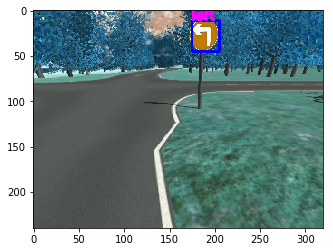

In [7]:
img2 = cv2.imread('083856_214346.png')
test_image(img2)